In [170]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np

In [171]:
train = pd.read_csv(r'C:\OneDrive - Parkway Pantai\WoRk\Pet projects\Jupyter notebook\Titanic dataset\train.csv')
test = pd.read_csv(r'C:\OneDrive - Parkway Pantai\WoRk\Pet projects\Jupyter notebook\Titanic dataset\test.csv')
combine = pd.concat([train.drop('Survived', axis=1),test])
view = train.copy()
view['One'] = 1

In [172]:
view.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 13 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Name           891 non-null object
Sex            891 non-null object
Age            714 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
Cabin          204 non-null object
Embarked       889 non-null object
One            891 non-null int64
dtypes: float64(2), int64(6), object(5)
memory usage: 90.6+ KB


In [173]:
view.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare,One
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000,891.0
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208,1.0
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429,0.0
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000,1.0
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400,1.0
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200,1.0
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000,1.0
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200,1.0


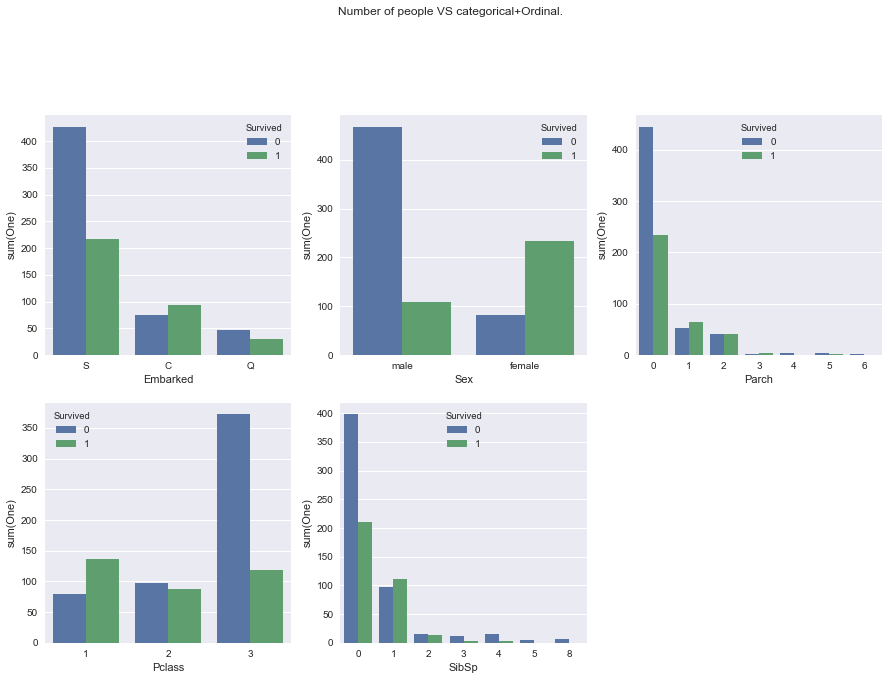

In [174]:
plt.figure(figsize=[15,15])
plt.suptitle('Number of people VS categorical+Ordinal.')
plt.subplot(331)
sns.barplot(x='Embarked',y='One',hue='Survived', data=view, estimator=sum)
plt.subplot(332)
sns.barplot(x='Sex',y='One',hue='Survived', data=view, estimator=sum)
plt.subplot(333)
sns.barplot(x='Parch',y='One',hue='Survived', data=view, estimator=sum)
plt.subplot(334)
sns.barplot(x='Pclass',y='One',hue='Survived', data=view, estimator=sum)
plt.subplot(335)
sns.barplot(x='SibSp',y='One',hue='Survived', data=view, estimator=sum)

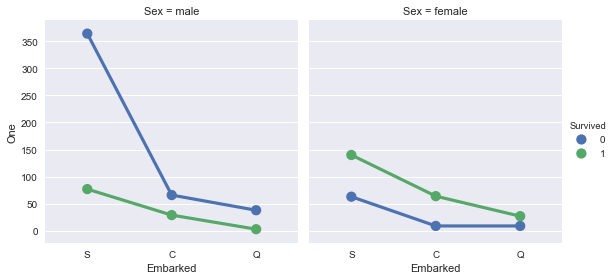

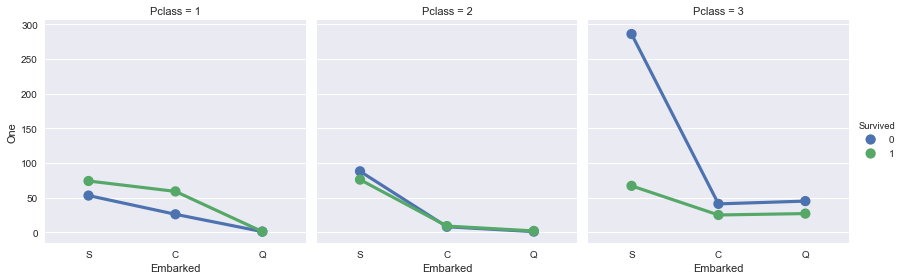

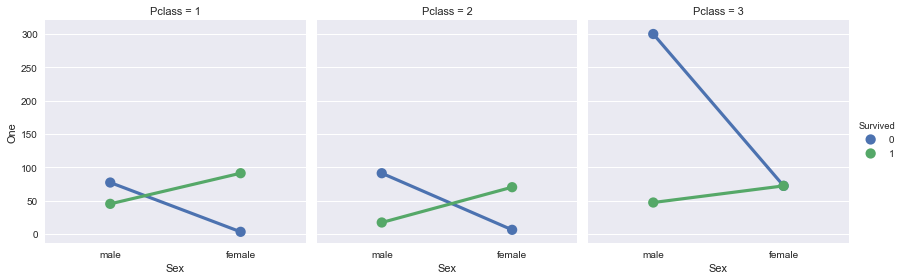

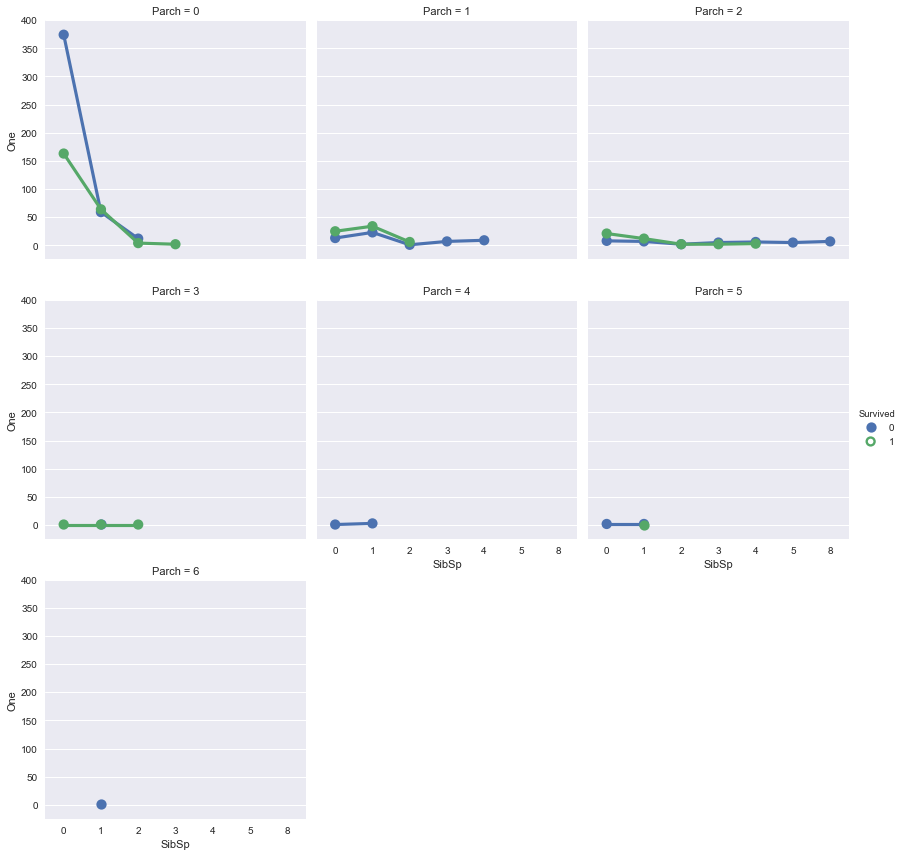

In [175]:
plt.figure(figsize=[15,15])
sns.factorplot(x='Embarked',y='One',hue='Survived',data=view,col='Sex', estimator=sum)
sns.factorplot(x='Embarked',y='One',hue='Survived',data=view,col='Pclass', estimator=sum)
sns.factorplot(x='Sex',y='One',hue='Survived',data=view,col='Pclass', estimator=sum)
sns.factorplot(x='SibSp',y='One',hue='Survived',data=view,col='Parch', estimator=sum, col_wrap=3)

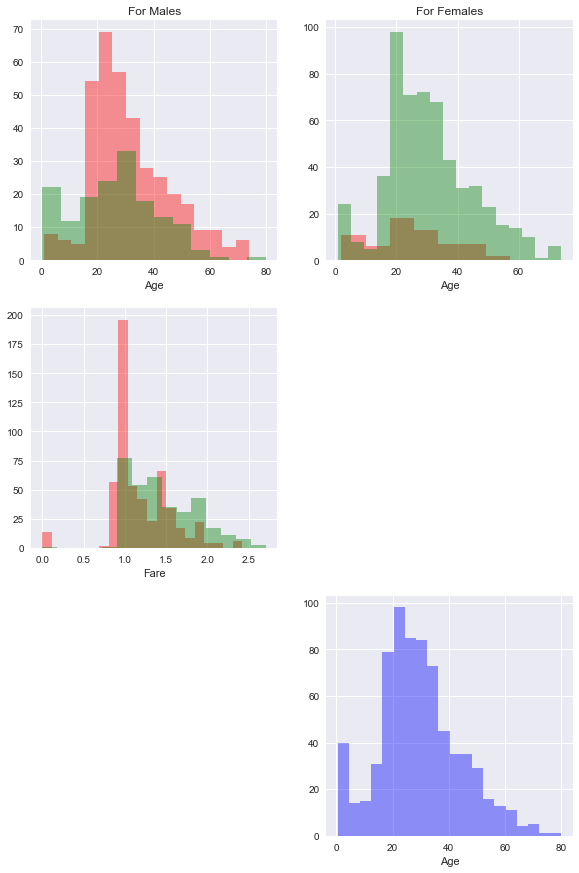

In [176]:
plt.figure(figsize=[15,15])
plt.subplot(331)
plt.title('For Males')
sns.distplot(view[(view.Survived == 0) & (view.Sex == 'male')].Age.dropna(), kde=False, color='red')
sns.distplot(view[view.Survived == 1 & (view.Sex == 'male')].Age.dropna(), kde=False, color='green')
plt.subplot(332)
plt.title('For Females')
sns.distplot(view[(view.Survived == 0) & (view.Sex == 'female')].Age.dropna(), kde=False, color='red')
sns.distplot(view[view.Survived == 1 & (view.Sex == 'female')].Age.dropna(), kde=False, color='green')
plt.subplot(334)
sns.distplot(np.log10(1+view[view.Survived == 0].Fare.dropna()), color='red', kde=False) 
sns.distplot(np.log10(1+view[view.Survived == 1].Fare.dropna()), color='green', kde=False) 
plt.subplot(338)
sns.distplot(view.Age.dropna(), kde=False, color='blue')

In [177]:
#Imputation
print view.isnull().sum()
##print view[view.Embarked.isnull()]
##print view[(view.Pclass == 1.) & (view.Sex == 'female') & (view.SibSp == 0 ) & (view.Parch == 0)].groupby('Embarked').count()
##view['Embarked'].iloc[61] = 'C'
##view['Embarked'].iloc[829] = 'C'


PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
One              0
dtype: int64


In [190]:
#New features
view['Female'] = (view.Sex == 'female') * 1
view['AgeGroup'] = pd.cut(view.Age, bins=(0,10,40,90), labels=[0,1,2])
view['AgeGroup'].fillna(1, inplace=True)
view['FamilySize'] = view.SibSp + view.Parch
view['FareGroup'] = pd.cut(np.log10(1+view.Fare),bins=[0,1,2,3], labels=[0,1,2])
view['FareGroup'].fillna(0, inplace=True)
view['Embarked_C'] = (view.Embarked == 'C') * 1
view['Embarked_Q'] = (view.Embarked == 'Q') *1
view['Embarked_S'] = (view.Embarked == 'S') *1

In [228]:
print view.columns.values

X = view.drop(['PassengerId','Survived', 'Name', 'Sex', 'Age', 'Ticket', 'Fare', 'Cabin', 'Embarked','One'], axis=1)
y = view['Survived']
X.isnull().sum()
X.columns.values

['PassengerId' 'Survived' 'Pclass' 'Name' 'Sex' 'Age' 'SibSp' 'Parch'
 'Ticket' 'Fare' 'Cabin' 'Embarked' 'One' 'Female' 'AgeGroup' 'FamilySize'
 'FareGroup' 'Embarked_C' 'Embarked_Q' 'Embarked_S']


array(['Pclass', 'SibSp', 'Parch', 'Female', 'AgeGroup', 'FamilySize',
       'FareGroup', 'Embarked_C', 'Embarked_Q', 'Embarked_S'], dtype=object)

In [197]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV
from sklearn.neighbors import KNeighborsClassifier

In [201]:
LR = LogisticRegression()
param = dict(C=np.arange(0.01,1,0.03))
gscv = GridSearchCV(LR,param, scoring='accuracy', cv=10)
gscv.fit(X,y)
gscv.best_score_

0.7991021324354658

In [202]:
LR = KNeighborsClassifier()
param = dict(n_neighbors=range(1,20), weights=['uniform','distance'])
gscv = GridSearchCV(LR,param, scoring='accuracy', cv=10)
gscv.fit(X,y)
gscv.best_score_

0.80808080808080807

In [241]:
from sklearn.svm import SVC
svc = SVC()
#param = dict(C=np.arange(0.001,1,0.003))
param = dict(C=[0.799])
gscv = GridSearchCV(svc,param, scoring='accuracy', cv=10)
gscv.fit(X,y)
print gscv.best_score_
print gscv.best_estimator_

0.82379349046
SVC(C=0.799, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape=None, degree=3, gamma='auto', kernel='rbf',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)


Decision tree

In [211]:
from sklearn.tree import DecisionTreeClassifier
dtc = DecisionTreeClassifier()
param = dict(max_depth=range(1,30))
gscv = GridSearchCV(dtc,param, scoring='accuracy', cv=10)
gscv.fit(X,y)
gscv.best_score_

0.82267115600448937

In [212]:
gscv.best_estimator_
gscv.

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=3,
            max_features=None, max_leaf_nodes=None,
            min_impurity_split=1e-07, min_samples_leaf=1,
            min_samples_split=2, min_weight_fraction_leaf=0.0,
            presort=False, random_state=None, splitter='best')

Random forest

In [252]:
from sklearn.ensemble import RandomForestClassifier
rfc = RandomForestClassifier()
param = dict(max_depth=range(1,30), n_estimators=[10])
gscv = GridSearchCV(rfc,param,cv=10, scoring='accuracy')
gscv.fit(X,y)
print gscv.best_score_
print gscv.best_estimator_

0.822671156004
RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=5, max_features='auto', max_leaf_nodes=None,
            min_impurity_split=1e-07, min_samples_leaf=1,
            min_samples_split=2, min_weight_fraction_leaf=0.0,
            n_estimators=10, n_jobs=1, oob_score=False, random_state=None,
            verbose=0, warm_start=False)


In [227]:
#Working with test data now

#print test.isnull().sum()
#New features
test['Female'] = (test.Sex == 'female') * 1
test['AgeGroup'] = pd.cut(test.Age, bins=(0,10,40,90), labels=[0,1,2])
test['AgeGroup'].fillna(1, inplace=True)
test['FamilySize'] = test.SibSp + test.Parch
test['FareGroup'] = pd.cut(np.log10(1+test.Fare),bins=[0,1,2,3], labels=[0,1,2])
test['FareGroup'].fillna(0, inplace=True)
test['Embarked_C'] = (test.Embarked == 'C') * 1
test['Embarked_Q'] = (test.Embarked == 'Q') *1
test['Embarked_S'] = (test.Embarked == 'S') *1

X_test = test.drop(['PassengerId', 'Name', 'Sex', 'Age', 'Ticket', 'Fare', 'Cabin', 'Embarked'], axis=1)
#print X_test.isnull().sum()
X_test.shape
X_test.columns.values


array(['Pclass', 'SibSp', 'Parch', 'Female', 'AgeGroup', 'FamilySize',
       'FareGroup', 'Embarked_C', 'Embarked_Q', 'Embarked_S'], dtype=object)

In [232]:
#Formalizing our model for:
#0.824915824916
#SVC(C=0.799, cache_size=200, class_weight=None, coef0=0.0,
#  decision_function_shape=None, degree=3, gamma='auto', kernel='rbf',
#max_iter=-1, probability=False, random_state=None, shrinking=True,
#  tol=0.001, verbose=False)

svc = SVC(C=0.799)
svc.fit(X,y)

SVC(C=0.799, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape=None, degree=3, gamma='auto', kernel='rbf',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)

In [239]:
pd.DataFrame(zip(test.PassengerId,svc.predict(X_test)), columns=['PassengerId','Survived']).to_csv('C:\OneDrive - Parkway Pantai\WoRk\Pet projects\Jupyter notebook\Titanic dataset\output.csv', index=False)